# 技术指标计算

本notebook演示如何计算常用的技术分析指标，包括移动平均线、RSI、MACD、布林带等。

## 1. 导入必要的库

In [23]:
import sys
import os

notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import load_stock_data
from src.indicators import (
    calculate_technical_indicators,
    calculate_sma,
    calculate_ema,
    calculate_rsi,
    calculate_macd,
    calculate_bollinger_bands,
    calculate_returns,
    calculate_volatility
)
from src.visualization import setup_chinese_font

setup_chinese_font()
print("库导入成功！")

库导入成功！


## 2. 加载股票数据

In [24]:
ticker = 'AAPL'
file_path = os.path.join(project_dir, 'data', f'{ticker}_stock_data.csv')

if os.path.exists(file_path):
    data = load_stock_data(file_path, ticker)
    print(f"数据加载完成！数据行数: {len(data)}")
    print(f"\n数据列: {list(data.columns)}")
    data.head()
else:
    print(f"数据文件不存在: {file_path}")
    print("提示: 请先运行 'python create_sample_data.py' 创建示例数据")

从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AAPL_stock_data.csv
数据加载完成！数据行数: 1304

数据列: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


## 3. 计算简单移动平均线 (SMA)

SMA_20 最新值: 370.91
SMA_50 最新值: 381.38


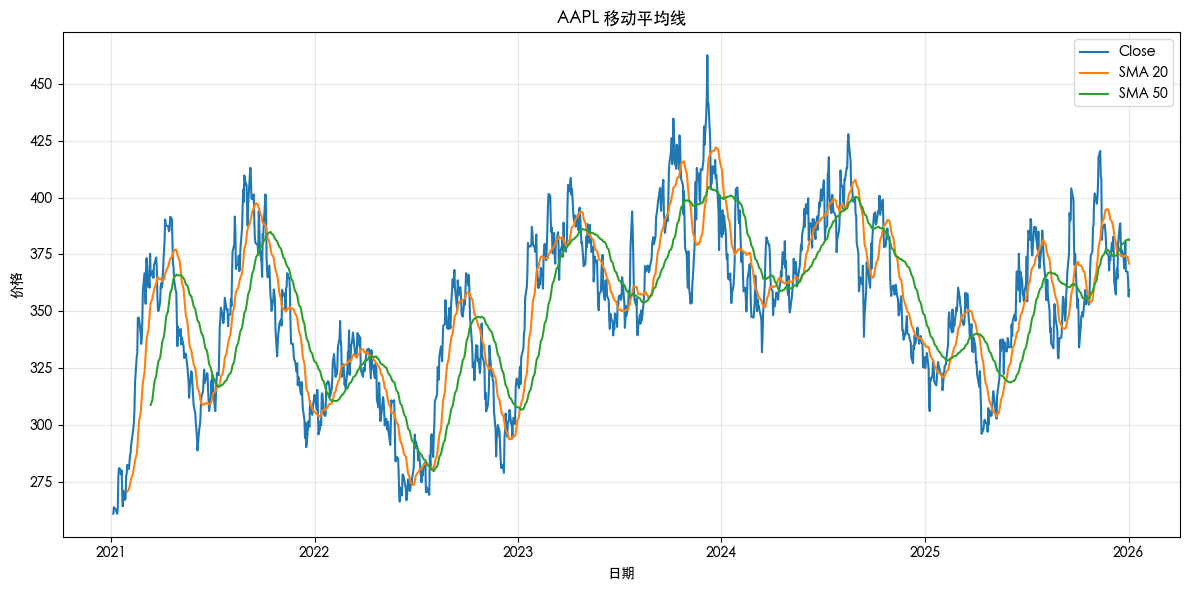

In [25]:
sma_20 = calculate_sma(data, 'Close', 20)
sma_50 = calculate_sma(data, 'Close', 50)

print(f"SMA_20 最新值: {sma_20.iloc[-1]:.2f}")
print(f"SMA_50 最新值: {sma_50.iloc[-1]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close', linewidth=1.5)
plt.plot(data.index, sma_20, label='SMA 20', linewidth=1.5)
plt.plot(data.index, sma_50, label='SMA 50', linewidth=1.5)
plt.title(f'{ticker} 移动平均线')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. 计算指数移动平均线 (EMA)

EMA_12 最新值: 367.95
EMA_26 最新值: 372.12


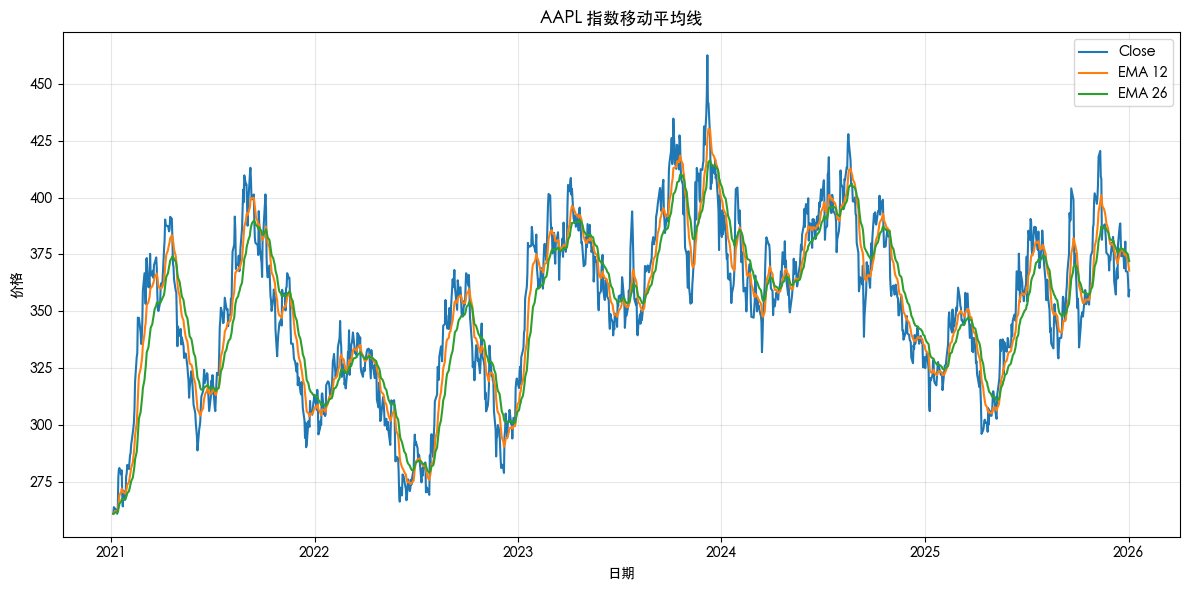

In [26]:
ema_12 = calculate_ema(data, 'Close', 12)
ema_26 = calculate_ema(data, 'Close', 26)

print(f"EMA_12 最新值: {ema_12.iloc[-1]:.2f}")
print(f"EMA_26 最新值: {ema_26.iloc[-1]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close', linewidth=1.5)
plt.plot(data.index, ema_12, label='EMA 12', linewidth=1.5)
plt.plot(data.index, ema_26, label='EMA 26', linewidth=1.5)
plt.title(f'{ticker} 指数移动平均线')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. 计算相对强弱指数 (RSI)

RSI_14 最新值: 41.03
当前RSI处于正常区间


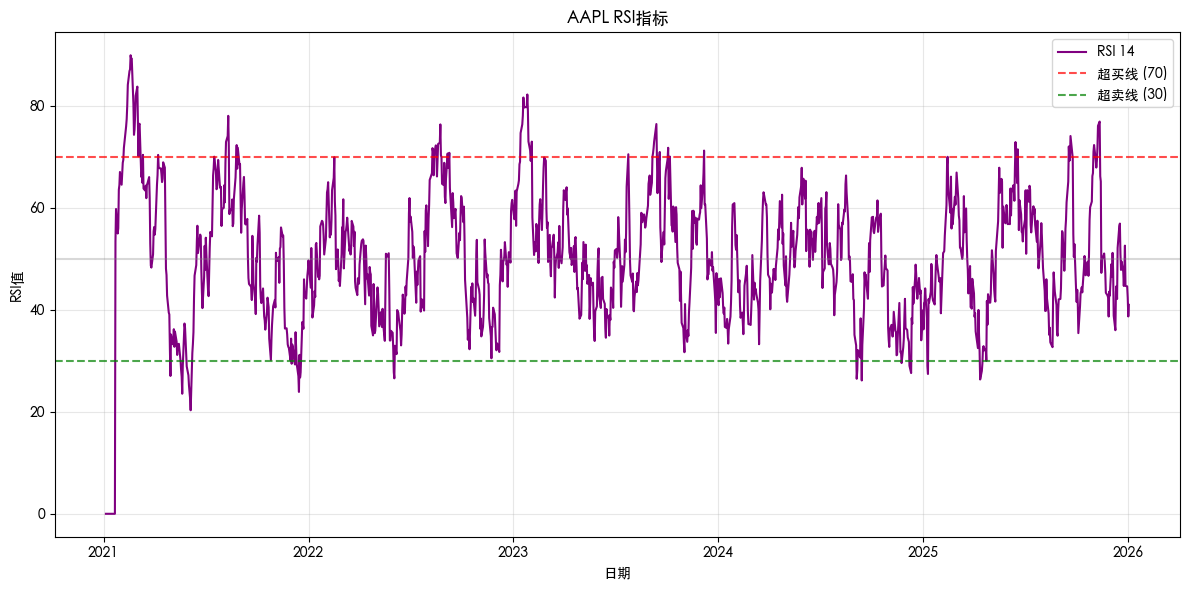

In [27]:
rsi_14 = calculate_rsi(data, 'Close', 14)

print(f"RSI_14 最新值: {rsi_14.iloc[-1]:.2f}")

if rsi_14.iloc[-1] > 70:
    print("当前RSI > 70，可能处于超买状态")
elif rsi_14.iloc[-1] < 30:
    print("当前RSI < 30，可能处于超卖状态")
else:
    print("当前RSI处于正常区间")

plt.figure(figsize=(12, 6))
plt.plot(data.index, rsi_14, label='RSI 14', linewidth=1.5, color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='超买线 (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='超卖线 (30)')
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.3)
plt.title(f'{ticker} RSI指标')
plt.xlabel('日期')
plt.ylabel('RSI值')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. 计算MACD指标

MACD 最新值: -4.18
Signal 最新值: -2.52
Histogram 最新值: -1.66


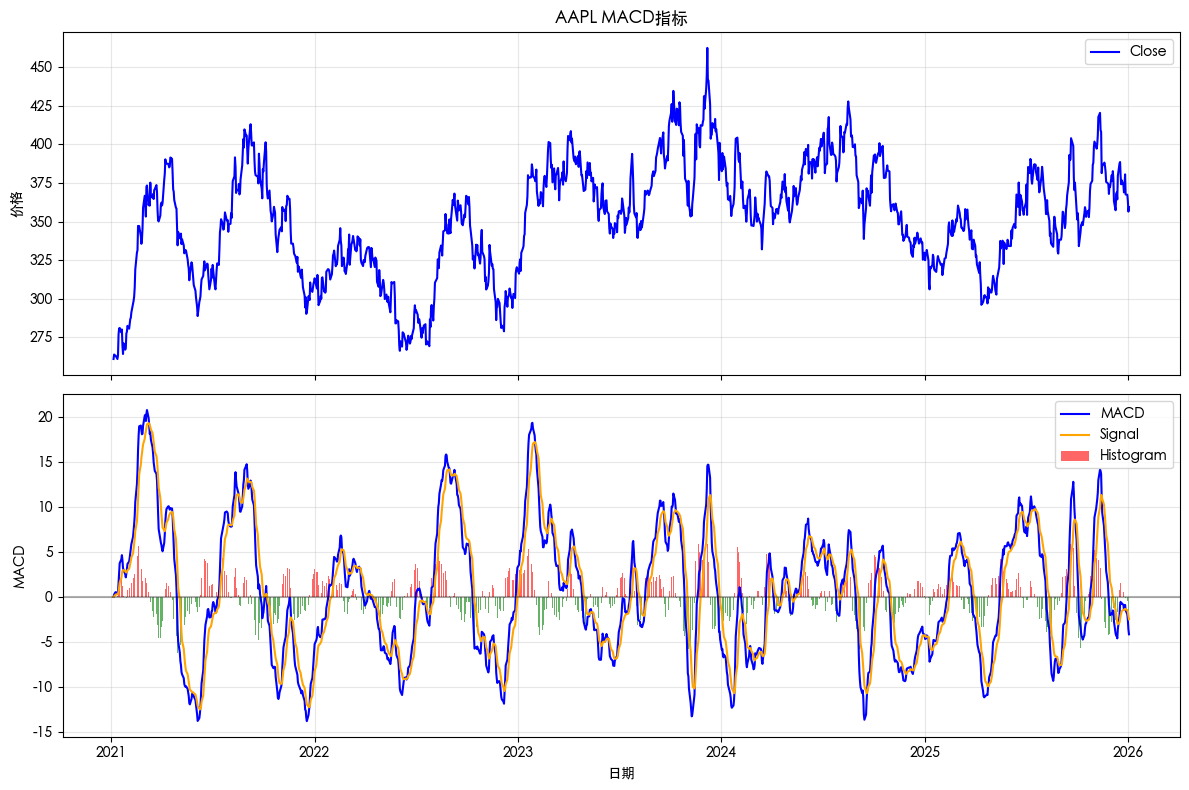

In [28]:
macd_df = calculate_macd(data, 'Close')

print(f"MACD 最新值: {macd_df['MACD'].iloc[-1]:.2f}")
print(f"Signal 最新值: {macd_df['Signal_Line'].iloc[-1]:.2f}")
print(f"Histogram 最新值: {macd_df['Histogram'].iloc[-1]:.2f}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(data.index, data['Close'], label='Close', linewidth=1.5, color='blue')
ax1.set_ylabel('价格')
ax1.set_title(f'{ticker} MACD指标')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(data.index, macd_df['MACD'], label='MACD', linewidth=1.5, color='blue')
ax2.plot(data.index, macd_df['Signal_Line'], label='Signal', linewidth=1.5, color='orange')
colors = ['red' if x >= 0 else 'green' for x in macd_df['Histogram']]
ax2.bar(data.index, macd_df['Histogram'], color=colors, alpha=0.6, label='Histogram')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.set_ylabel('MACD')
ax2.set_xlabel('日期')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. 计算布林带

上轨 最新值: 389.41
中轨 最新值: 370.91
下轨 最新值: 352.41


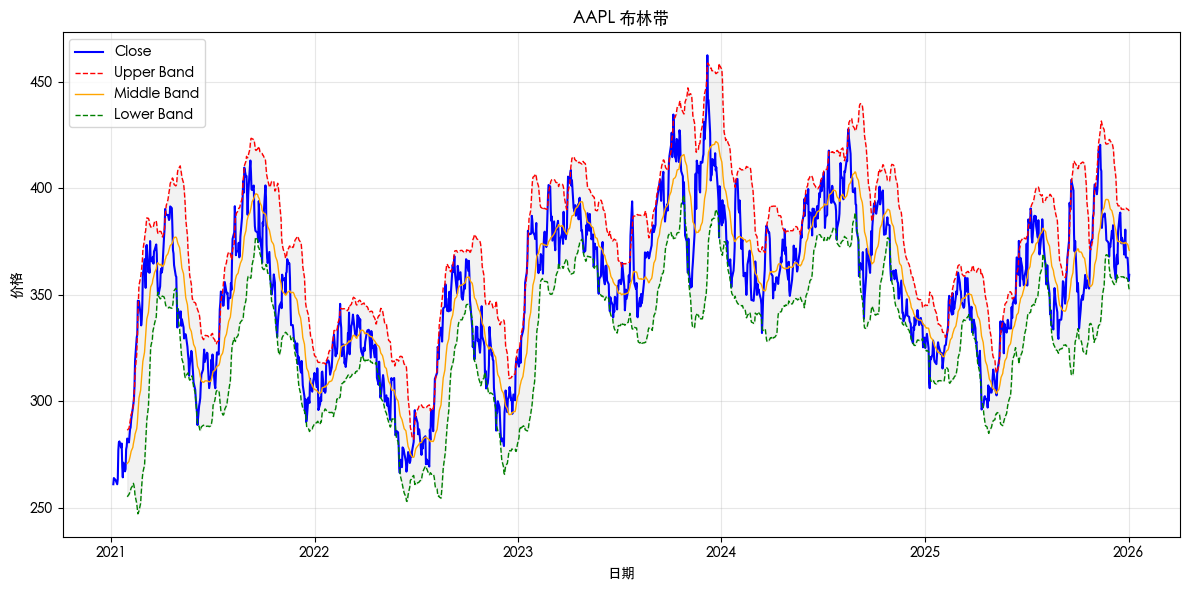

In [29]:
bb_df = calculate_bollinger_bands(data, 'Close')

print(f"上轨 最新值: {bb_df['Upper'].iloc[-1]:.2f}")
print(f"中轨 最新值: {bb_df['Middle'].iloc[-1]:.2f}")
print(f"下轨 最新值: {bb_df['Lower'].iloc[-1]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close', linewidth=1.5, color='blue')
plt.plot(data.index, bb_df['Upper'], label='Upper Band', linewidth=1, color='red', linestyle='--')
plt.plot(data.index, bb_df['Middle'], label='Middle Band', linewidth=1, color='orange')
plt.plot(data.index, bb_df['Lower'], label='Lower Band', linewidth=1, color='green', linestyle='--')
plt.fill_between(data.index, bb_df['Upper'], bb_df['Lower'], alpha=0.1, color='gray')
plt.title(f'{ticker} 布林带')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. 计算波动率

当前20日波动率: 0.33


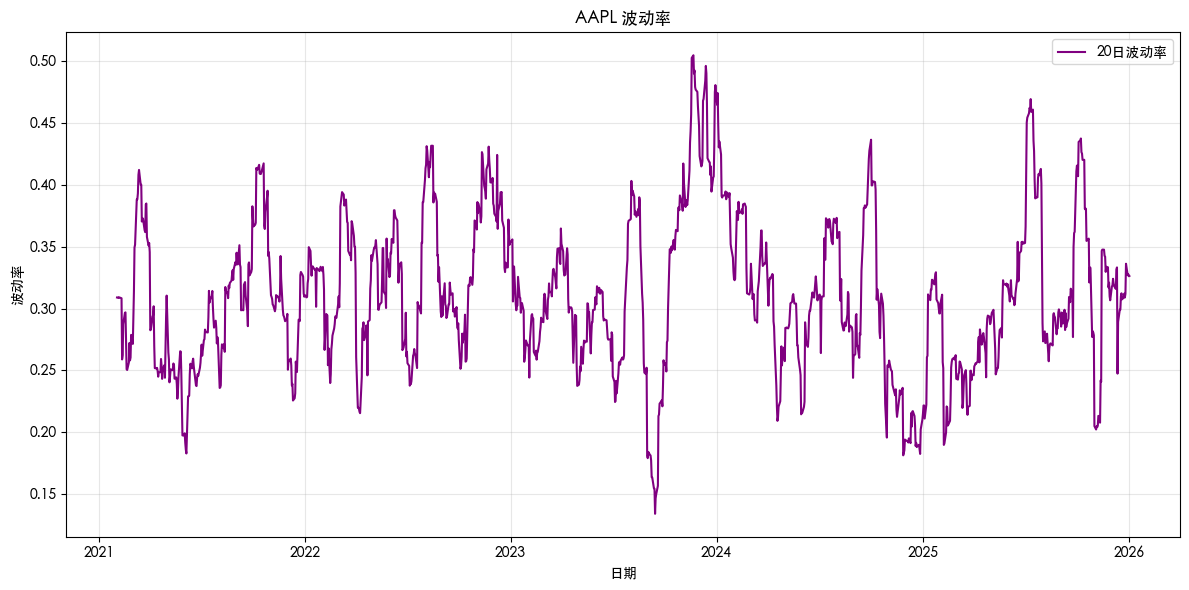

In [30]:
volatility = calculate_volatility(data, 'Close', 20)

print(f"当前20日波动率: {volatility.iloc[-1]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, volatility, label='20日波动率', linewidth=1.5, color='purple')
plt.title(f'{ticker} 波动率')
plt.xlabel('日期')
plt.ylabel('波动率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. 计算收益率

最新日收益率: 0.81%
平均日收益率: 0.04%
收益率标准差: 1.99%


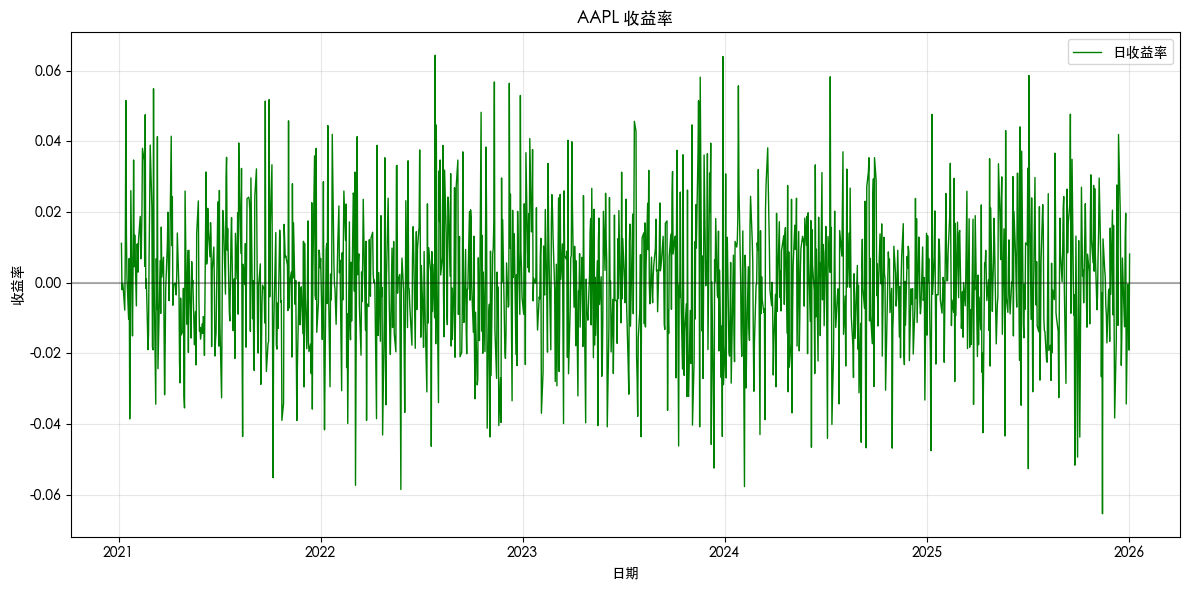

In [31]:
returns = calculate_returns(data, 'Close')

print(f"最新日收益率: {returns.iloc[-1]:.2%}")
print(f"平均日收益率: {returns.mean():.2%}")
print(f"收益率标准差: {returns.std():.2%}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, returns, label='日收益率', linewidth=1, color='green')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title(f'{ticker} 收益率')
plt.xlabel('日期')
plt.ylabel('收益率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. 一次性计算所有技术指标

In [32]:
data_with_indicators = calculate_technical_indicators(data)

print(f"技术指标计算完成！")
print(f"\n数据列: {list(data_with_indicators.columns)}")
print(f"\n数据行数: {len(data_with_indicators)}")

data_with_indicators.tail()

技术指标计算完成！

数据列: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'Signal_Line', 'MACD_Histogram', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'Daily_Change_Pct', 'Volume_SMA_20']

数据行数: 1304


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,RSI_14,MACD,Signal_Line,MACD_Histogram,BB_Middle,BB_Upper,BB_Lower,Daily_Change_Pct,Volume_SMA_20
Date,,,,,,,,,,,,,,,,,
2025-12-26 23:19:25.658854,368.02,368.60,361.67,367.56,367.56,8377211,374.4250,381.2194,44.736081,-1.497117,-1.379054,-0.118063,374.4250,390.772047,358.077953,-3.431244,10542777.95
2025-12-29 23:19:25.658854,367.30,368.27,366.96,367.41,367.41,6100247,373.7930,381.4258,44.653097,-1.951501,-1.493543,-0.457958,373.7930,390.201627,357.384373,-0.040810,10324125.55
2025-12-30 23:19:25.658854,364.07,364.19,362.36,363.42,363.42,10542677,373.1345,381.6356,42.400065,-2.603551,-1.715545,-0.888006,373.1345,390.117513,356.151487,-1.085980,10368170.90
2025-12-31 23:19:25.658854,356.84,358.70,356.11,356.49,356.49,12217200,371.8240,381.5880,38.743605,-3.637567,-2.099949,-1.537618,371.8240,389.719605,353.928395,-1.906885,10473930.90
2026-01-01 23:19:25.658854,364.29,365.58,359.07,359.38,359.38,11351766,370.9100,381.3792,41.027586,-4.175698,-2.515099,-1.660599,370.9100,389.407719,352.412281,0.810682,10634181.45


## 11. 综合技术分析图表

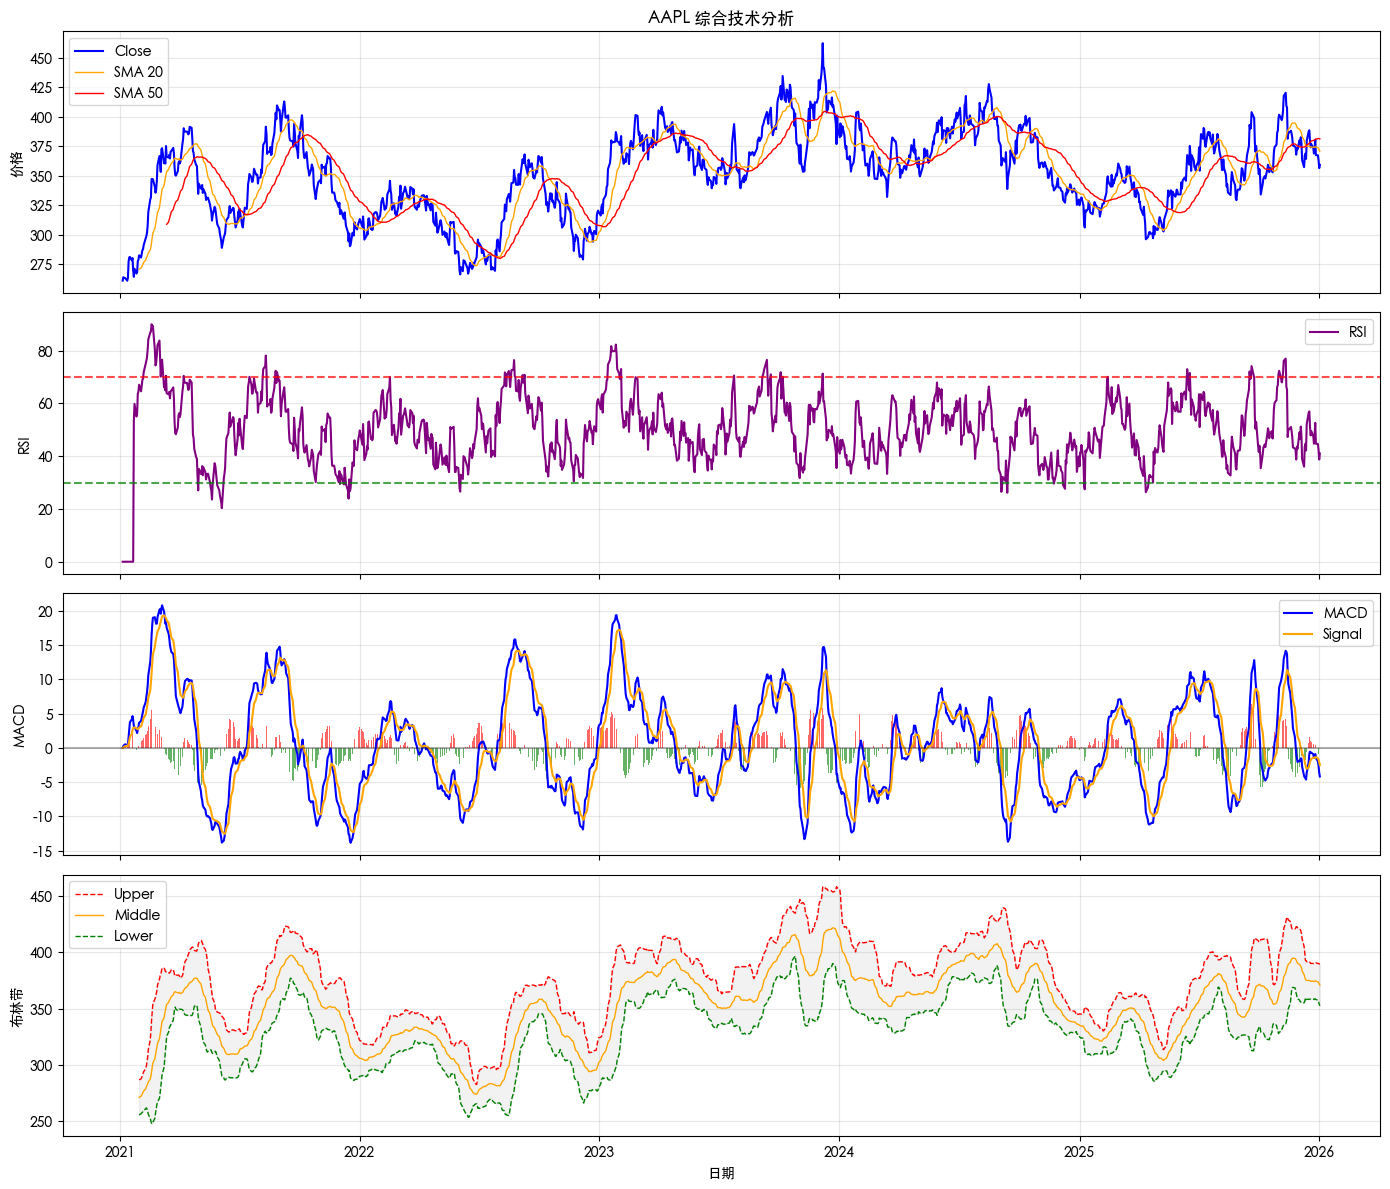

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data.index, data['Close'], label='Close', linewidth=1.5, color='blue')
axes[0].plot(data.index, data_with_indicators['SMA_20'], label='SMA 20', linewidth=1, color='orange')
axes[0].plot(data.index, data_with_indicators['SMA_50'], label='SMA 50', linewidth=1, color='red')
axes[0].set_ylabel('价格')
axes[0].set_title(f'{ticker} 综合技术分析')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(data.index, data_with_indicators['RSI_14'], label='RSI', linewidth=1.5, color='purple')
axes[1].axhline(y=70, color='r', linestyle='--', alpha=0.7)
axes[1].axhline(y=30, color='g', linestyle='--', alpha=0.7)
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(data.index, data_with_indicators['MACD'], label='MACD', linewidth=1.5, color='blue')
axes[2].plot(data.index, data_with_indicators['Signal_Line'], label='Signal', linewidth=1.5, color='orange')
colors = ['red' if x >= 0 else 'green' for x in data_with_indicators['MACD_Histogram']]
axes[2].bar(data.index, data_with_indicators['MACD_Histogram'], color=colors, alpha=0.6)
axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[2].set_ylabel('MACD')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].plot(data.index, data_with_indicators['BB_Upper'], label='Upper', linewidth=1, color='red', linestyle='--')
axes[3].plot(data.index, data_with_indicators['BB_Middle'], label='Middle', linewidth=1, color='orange')
axes[3].plot(data.index, data_with_indicators['BB_Lower'], label='Lower', linewidth=1, color='green', linestyle='--')
axes[3].fill_between(data.index, data_with_indicators['BB_Upper'], data_with_indicators['BB_Lower'], alpha=0.1, color='gray')
axes[3].set_ylabel('布林带')
axes[3].set_xlabel('日期')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. 技术指标分析总结

In [34]:
print("=" * 60)
print(f"{ticker} 技术指标分析总结")
print("=" * 60)

latest_close = data['Close'].iloc[-1]
latest_sma_20 = data_with_indicators['SMA_20'].iloc[-1]
latest_sma_50 = data_with_indicators['SMA_50'].iloc[-1]
latest_rsi = data_with_indicators['RSI_14'].iloc[-1]
latest_macd = data_with_indicators['MACD'].iloc[-1]
latest_macd_signal = data_with_indicators['Signal_Line'].iloc[-1]
latest_bb_upper = data_with_indicators['BB_Upper'].iloc[-1]
latest_bb_lower = data_with_indicators['BB_Lower'].iloc[-1]

print(f"\n1. 价格信息:")
print(f"   最新收盘价: {latest_close:.2f}")
print(f"   SMA_20: {latest_sma_20:.2f}")
print(f"   SMA_50: {latest_sma_50:.2f}")

if latest_close > latest_sma_20:
    print("   ✓ 价格位于SMA_20上方，短期趋势向上")
else:
    print("   ✗ 价格位于SMA_20下方，短期趋势向下")

if latest_sma_20 > latest_sma_50:
    print("   ✓ SMA_20 > SMA_50，金叉信号，看涨")
else:
    print("   ✗ SMA_20 < SMA_50，死叉信号，看跌")

print(f"\n2. RSI指标:")
print(f"   RSI_14: {latest_rsi:.2f}")
if latest_rsi > 70:
    print("   ⚠ RSI > 70，可能超买")
elif latest_rsi < 30:
    print("   ⚠ RSI < 30，可能超卖")
else:
    print("   ✓ RSI处于正常区间")

print(f"\n3. MACD指标:")
print(f"   MACD: {latest_macd:.2f}")
print(f"   Signal: {latest_macd_signal:.2f}")
print(f"   Histogram: {latest_macd - latest_macd_signal:.2f}")

if latest_macd > latest_macd_signal:
    print("   ✓ MACD > Signal，看涨")
else:
    print("   ✗ MACD < Signal，看跌")

print(f"\n4. 布林带:")
print(f"   上轨: {latest_bb_upper:.2f}")
print(f"   下轨: {latest_bb_lower:.2f}")
print(f"   价格位置: {((latest_close - latest_bb_lower) / (latest_bb_upper - latest_bb_lower) * 100):.1f}%")

if latest_close > latest_bb_upper:
    print("   ⚠ 价格突破上轨，可能超买")
elif latest_close < latest_bb_lower:
    print("   ⚠ 价格跌破下轨，可能超卖")
else:
    print("   ✓ 价格在布林带内")

print("\n" + "=" * 60)

AAPL 技术指标分析总结

1. 价格信息:
   最新收盘价: 359.38
   SMA_20: 370.91
   SMA_50: 381.38
   ✗ 价格位于SMA_20下方，短期趋势向下
   ✗ SMA_20 < SMA_50，死叉信号，看跌

2. RSI指标:
   RSI_14: 41.03
   ✓ RSI处于正常区间

3. MACD指标:
   MACD: -4.18
   Signal: -2.52
   Histogram: -1.66
   ✗ MACD < Signal，看跌

4. 布林带:
   上轨: 389.41
   下轨: 352.41
   价格位置: 18.8%
   ✓ 价格在布林带内

